In [39]:
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from pyclustertend import metric 
from pyclustertend import visual_assessment_of_tendency

In [40]:
iris = datasets.load_iris()
clust1 = scale(iris.data) # vamos usar o sacale para normalizar os dados
clust2 = scale(np.random.rand(150,4)) # vamos usar o numpy rand para gerar uma matriz com 150 linhas e 4 colunas de dados aleatorios, o mesmo
# formato do cluster 1, mas sem nenhuma relação
print(clust2)

[[-0.50260826  0.13218384  0.93218968  0.02717209]
 [-0.01674559 -1.4585977   0.85085082  0.52939524]
 [-0.12506278  0.5779818  -0.29257393  0.50028182]
 [ 1.23926843  0.34328828  0.08494525  0.30825093]
 [ 1.17064451 -1.30171779 -0.54019151  0.38103885]
 [-1.00630163  0.5046651  -1.11099601 -0.70426531]
 [ 0.61954489  0.87815654  0.11820902 -0.34988444]
 [-1.09249777  0.0387675  -0.86918446  0.93729312]
 [ 0.04377169 -1.39275888 -0.53452256  1.54649244]
 [-0.32728687 -1.43946967 -0.24397985 -0.72989051]
 [ 0.94675632  0.53855794  0.22708308 -1.75149137]
 [ 0.04711786  1.00813217  0.0040122   0.41708198]
 [ 0.91844262  0.6237436  -0.17221696 -1.43889625]
 [ 1.23972529  0.92779801  0.31996864 -0.53173981]
 [-1.6314389  -1.29092681  0.88817922  0.08411765]
 [ 1.37970253  0.09962291  1.46089378  1.63002236]
 [ 0.71231795  1.04656737  1.53757726  1.69858542]
 [ 0.89081679  1.04577194  0.59480708 -0.48991916]
 [ 0.70871641  0.55395202 -0.06341479 -1.7237706 ]
 [ 1.37388984 -0.79216575  1.46

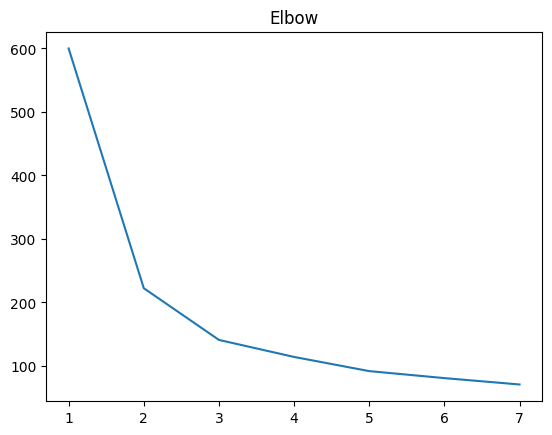

In [ ]:
inertia = [] # é uma propriedade do modelo kmeans que precisamos ler para gerar o gráfico. 
# Vamos gerar vários clusters e ver qual o melhor número de clusters para o nosso modelo
# para cada um coletar a inertia e plotar o gráfico
for i in range(1,8):
  kmeans = KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(clust1)
  inertia.append(kmeans.inertia_)
plt.plot(range(1,8), inertia)
plt.title("Elbow")
plt.show()

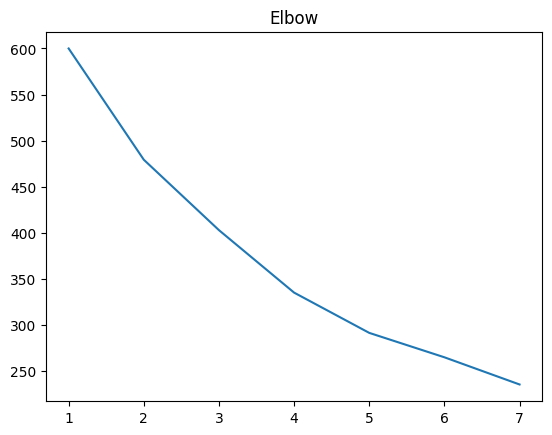

In [42]:
inertia = []
for i in range(1,8):
  kmeans = KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(clust2)
  inertia.append(kmeans.inertia_)
plt.plot(range(1,8), inertia)
plt.title("Elbow")
plt.show()

In [54]:
# Quanto mais próximo de zero resultado dessa estatística, 
# há uma tendência maior de haver agrupamentos.
# Quanto mais próximo de um, mais mostra que os dados 
# estão distribuídos aleatoriamente e um valor intermediário
# algo, por exemplo, entre 0 e 0 ponto cinco, mostra que 
# não existe uma estrutura clara.
print("Cluster 1: ", hopkins(clust1,150) )
print("Cluster 2: ", hopkins(clust2,150) )

Cluster 1:  0.1763456614293493
Cluster 2:  0.5081078059694553


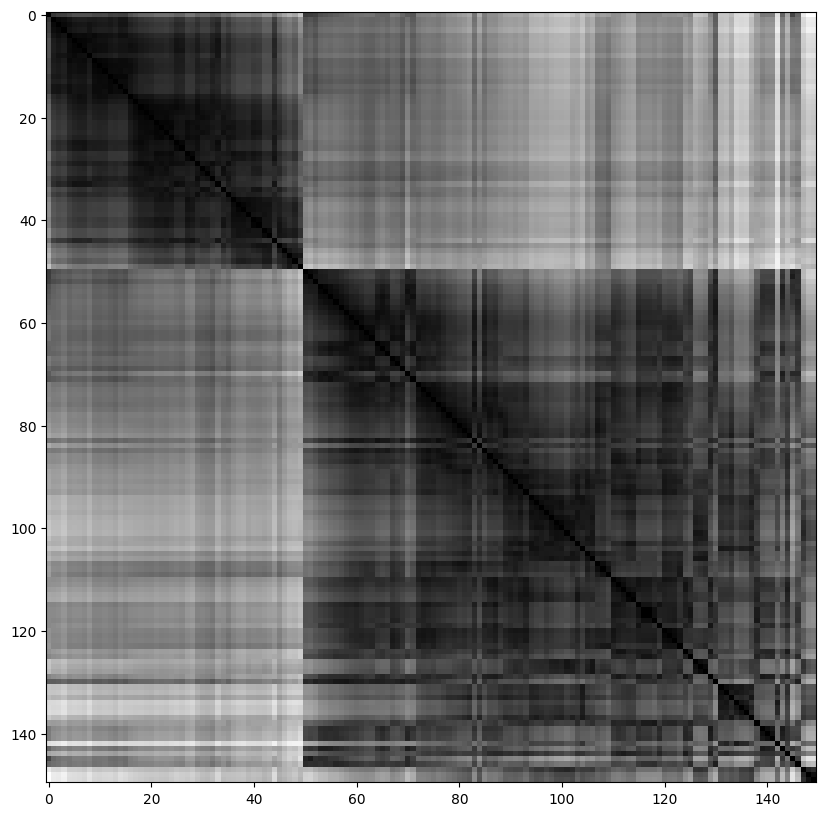

In [45]:
visual_assessment_of_tendency.vat(clust1)

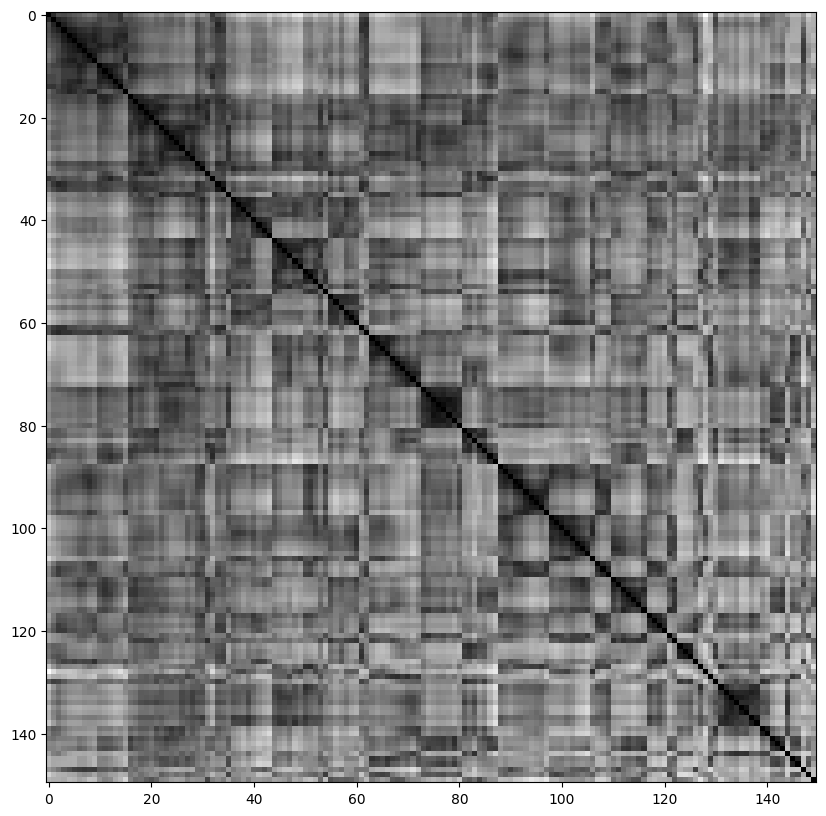

In [46]:
visual_assessment_of_tendency.vat(clust2)

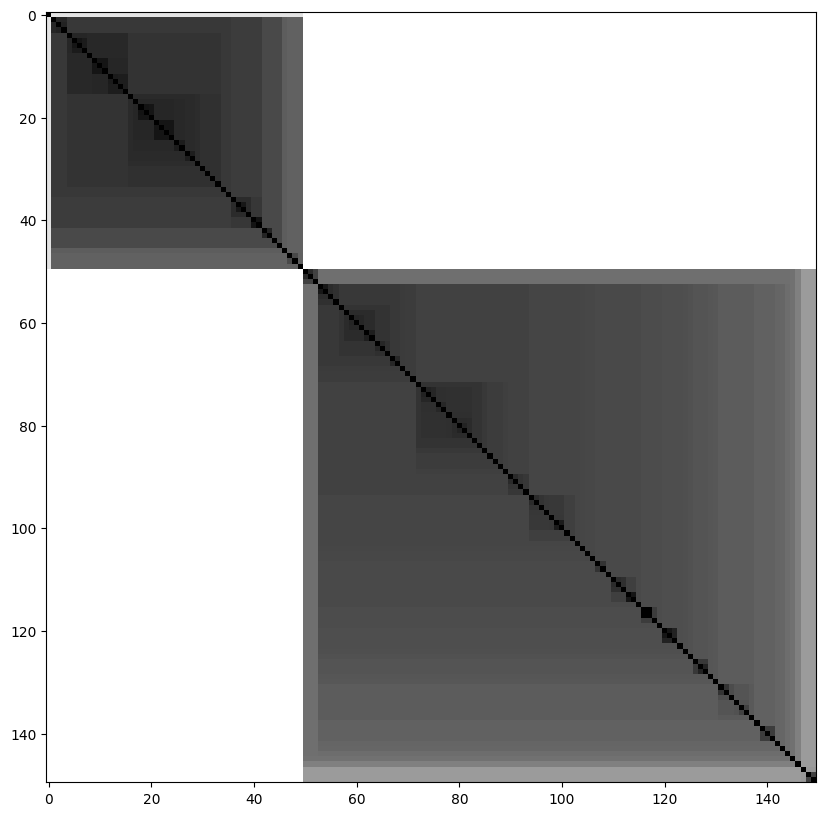

In [47]:
visual_assessment_of_tendency.ivat(clust1)

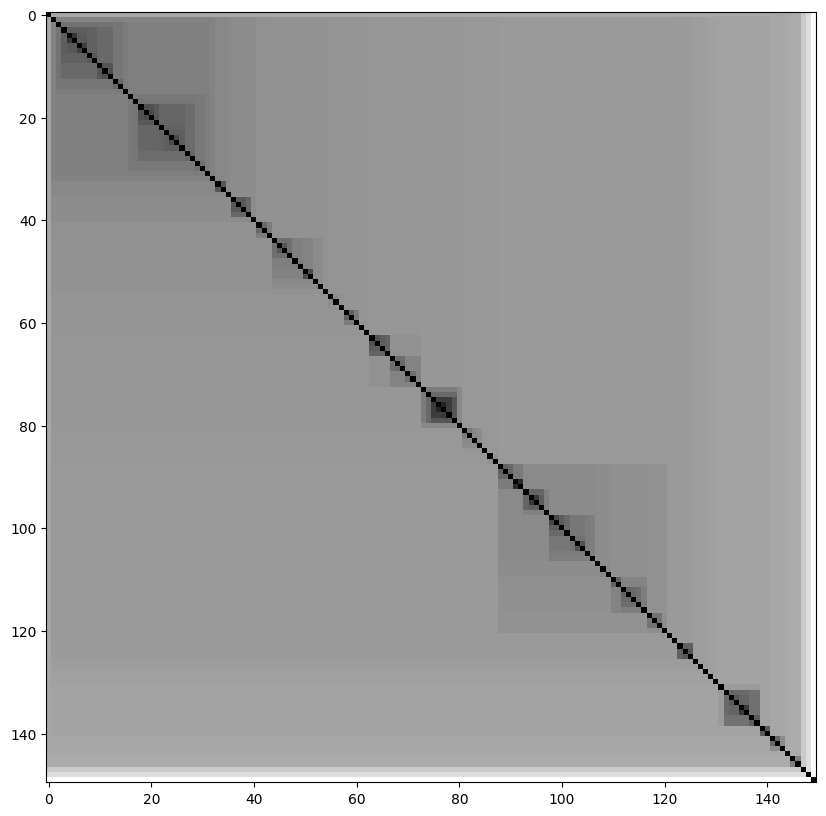

In [48]:
visual_assessment_of_tendency.ivat(clust2)

In [57]:
#m = assess_tendency_by_metric(clust1,'silhouette',5)
#m = assess_tendency_by_metric(clust1,'davies_bouldin',5)
m = metric.assess_tendency_by_metric(clust1,'calinski_harabasz',5)
print("Cluster 1: ", m)
#m = assess_tendency_by_metric(clust2,'silhouette',5)
#m = assess_tendency_by_metric(clust2,'davies_bouldin',5)
m = metric.assess_tendency_by_metric(clust2,'calinski_harabasz',5)
print("Cluster 2: ", m)



Cluster 1:  (2, array([251.34933946, 241.42632349, 206.2286231 , 202.63665916]))
Cluster 2:  (5, array([36.12503278, 35.72889853, 34.71686835, 37.88073359]))


In [ ]:
m = metric.assess_tendency_by_mean_metric_score(clust1,5) # Ele busca a média dos três metodos de avaliação
print("Cluster 1: ", m)
m = metric.assess_tendency_by_mean_metric_score(clust2,5)
print("Cluster 2: ", m)

Cluster 1:  2.0
Cluster 2:  5.0
